# Radiative data for transition from n to n' in hydrogen (Z=1)

Using ARC package to reproduce the Table 1 in paper D. Hoang-Binh (1990)

## First calculation 
is the dipole moment corresponding to the transition from the state (n,l) to (n',l') of a hydrogenic atom for l'=l-1 and l'-l+1:
\begin{equation}
R(n,l;n',l') = \int \mathbf{d}r~R_{n_1,l_1,j_1}(r)\cdot                 R_{n_1,l_1,j_1}(r) \cdot r^3
\end{equation}

I replicate the graph in the paper, plotting:
\begin{equation}
[ R(n_1,\ell_1;n_2,\ell_2) ]^2  \quad VS \quad  x'   =   \frac{l\varDelta l}{n'}
\end{equation}

## Second calculation
is for the absorption oscillator strength, or f-value, for the transition from the lower state (l',n') to upper state (n,l), related by radial integral, calculated in the first calculation. Also for l'=l-1 and l'=l+1:
\begin{equation}
f(n',l';n,l) = \frac{1}{3} \quad (\frac{\nu}{\mathrm{Ry}}) \quad [ \frac{max(\ell_1,\ell_2)}{(2\ell_2 + 1)} ] \quad [ R(n_1,\ell_1;n_2,\ell_2) ]^2
\end{equation}

## Third calculation
* Einstein coefficient, calculated in the paper as:
\begin{equation}
A(n,l;n',l') = \frac{64 \pi^4 \nu^3}{3 h c^3}\quad [ \frac{max(\ell_1,\ell_2)}{(2\ell_2 + 1)} ] \quad e^2 \quad a_{0}^2 \quad [ R(n_1,\ell_1;n_2,\ell_2) ]^2
\end{equation}

* Using ARC the function that gives the Einstein coefficient A when Temperature = 0, getTransitionRate: [see ARC function here](http://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/alkali_atom_functions.html#arc.alkali_atom_functions.AlkaliAtom.getTransitionRate) 

## Compare data
we can compare the data obtained with the formulae in the paper using ARC and find out what functions are useful for the research, so we can calculate the theoretical shape of the spectral lines. 

### Output

Data file with all the results. This file is used in notebook Precision_Number to compare with the original data from D. Hoang-Binh paper


In [1]:
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np
import scipy.constants
import math

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

def getFrequencyWithRydberg(n1, n2):
    # Calculate the frequency using Rydberg formula
    
    from scipy.constants import c
    from scipy.constants import Rydberg
    
    print('--> Constants used')
    print(c)
    print(Rydberg)
    
    # Return the frequency 
    return c / ( 1 / ( Rydberg * ( 1/(n2**2) - 1/(n1**2) ) ) )

# Working with a Hydrogen atom
atom = Hydrogen()

In [2]:
# Define the transition we are studing
# Upper state
n1 = 111
# Lower state
n2 = 110

# Transition frequency: used in second and third calculation
# It is the same for n1 and n2.

# ARC
tfreq = abs(atom.getTransitionFrequency(n1,0,0.5,n2,1,0.5))

# Using Rydberg formula
#tfreq = getFrequencyWithRydberg(n1,n2)

In [3]:
# I am going to use a NumPy array to store the calculations data.
# 2 Dimensions: Rows are the number of l values calculating
#               Columns 9, defined as:
#                   0 : l value use in all calculations in this row
#                   1 : R(n1,l;n2,l-1) - using ARC
#                   2 : R(n1,l;n2,l+1) - using ARC
#                   3 : f(n2,l-1;n1,l) - this calculation will use value stored in [1]
#                   4 : f(n2,l+1;n1,l) - this calculation will use value stored in [2]
#                   5 : A(n1,l;n2,l-1) - using D. Hoang-Binh formula and value in [1]
#                   6 : A(n1,l;n2,l+1) - using D. Hoang-Binh formula and value in [2]
#                   7 : A(n1,l;n2,l-1) - using ARC and value in [1]
#                   8 : A(n1,l;n2,l+1) - using ARC and value in [2]
# Define varialbes for column index, for clarity
value_l = 0
R_l_minus1 = 1
R_l_plus1 = 2
f_l_minus1 = 3
f_l_plus1 = 4
A_l_minus1 = 5
A_l_plus1 = 6
A_arc_l_minus1 = 7
A_arc_l_plus1 = 8

# Define the values of l that we are going to calculate: comment the line not used
# Using a Numpy ndarray
# States calculated in the paper
l_states = [0,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,105,106,107,108,109,110]
columns = 8
# All posible states for l, from 0 to n2
#l_states = range(n2)

# Define the types of the columns
# Initialize the np array with zeros for the calculations and the type for the resusts
data = np.zeros((len(l_states),columns),dtype=np.float64)
# Append the list with l_states, they are cast to float
data = np.column_stack((l_states,data))


## First Calculation: Radia Integral
\begin{equation}
[ R(n_1,\ell_1;n_2,\ell_2) ]^2
\end{equation}

In [4]:
# Function to get the Dipole Moment from ARC and check that l state is valid
def getDipoleMoment( n1, l1, j1, n2, l2, j2 ):
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
        # Eq 2 in 
        R = atom.getRadialMatrixElement(n1, l1, j1, n2, l2, j2)
        return R
    else:
        return float('nan')
    
# Initialise the list that will contain the tuples with the data
plot_data = []
    
# Printing the table and doing the calculations
print('Table 1 Radiative data for transitions from n1 = %d n2 = %d in hydrogen (Z = 1)\n' % (n1,n2))
print('R(n1,l1;n2,l2)^2 Dipole moment for l')
print('  l\tl2= l1 -1\t\tl2= l1 +1')
print('-------------------------------------------------')
i=0 # Iterator for the row we are working on
for l in data[:,value_l]:
    # Each l is the value of l for this calculation
    l_int = int(l)
    # Here I square the dipole moment, so it is saved squared
    data[i][R_l_minus1] = getDipoleMoment(n1, l_int, l+0.5, n2, l_int-1, l-0.5)**2
    data[i][R_l_plus1] =  getDipoleMoment(n1, l_int, l+0.5, n2, l_int+1, l+0.5)**2
    
    print('%3d\t%9.3e\t\t%.3e ' % (l,data[i][R_l_minus1],data[i][R_l_plus1]))
    
    # Calculate the data to plot the next graphic
    # It is a list to tuple, each tuple is (x,y), where x = (l(l-l')/n') and y = [R(n,l;n',l')]**2
    if  not math.isnan(data[i][R_l_minus1]):
        plot_data.append((l_int/n2,data[i][R_l_minus1]))
    
    if not math.isnan(data[i][R_l_plus1]):
        plot_data.append((-l_int/n2,data[i][R_l_plus1]))    
    
    
    # Next iteration
    i+=1

Table 1 Radiative data for transitions from n1 = 111 n2 = 110 in hydrogen (Z = 1)

R(n1,l1;n2,l2)^2 Dipole moment for l
  l	l2= l1 -1		l2= l1 +1
-------------------------------------------------
  0	      nan		1.540e+07 
  1	1.617e+07		1.502e+07 
  2	1.657e+07		1.465e+07 
  3	1.697e+07		1.429e+07 
  4	1.738e+07		1.393e+07 
  5	1.780e+07		1.359e+07 
 10	2.003e+07		1.194e+07 
 20	2.515e+07		9.106e+06 
 30	3.128e+07		6.789e+06 
 40	3.862e+07		4.918e+06 
 50	4.737e+07		3.426e+06 
 60	5.781e+07		2.261e+06 
 70	7.022e+07		1.377e+06 
 80	8.496e+07		7.377e+05 
 90	1.025e+08		3.113e+05 
100	1.232e+08		7.300e+04 
105	1.350e+08		1.769e+04 
106	1.375e+08		1.142e+04 
107	1.400e+08		6.699e+03 
108	1.426e+08		3.551e+03 
109	1.452e+08		nan 
110	1.478e+08		nan 


## Plotting
\begin{equation}
[ R(n_1,\ell_1;n_2,\ell_2) ]^2  \quad VS \quad  x'   =   \frac{l\varDelta l}{n'}
\end{equation}

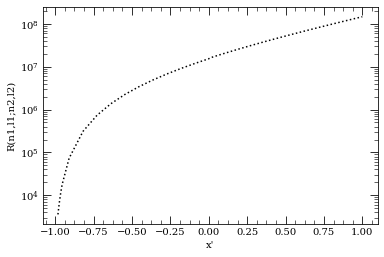

In [5]:
# Define a function to return the value of the first element of the tuple, so we can sort the X axis
def getKey(item):
    return item[0]

# Sort the x value on the plot_data and print the graphic
plot_data.sort(key=getKey)

x_axis = []
y_axis = []

for i in plot_data:
    x_axis.append(i[0])
    y_axis.append(i[1])


ax = plt.subplot(111)
#ax.plot(x_axis,y_axis)
ax.semilogy(x_axis,y_axis,"k:")
ax.set_xlabel(r"x'")
ax.set_ylabel(r"R(n1,l1;n2,l2)")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


From my results, the values for l'=l+1 for n in (106,107,108) are different. R(n,l;n',l') is always decreasing until l=106 but the values for l=108 and l=109 are increasing (always for l'=l+1)

## Second Calculation
\begin{equation}
f(n',l';n,l) \, as \, a \, function \, of \, [ R(n_1,\ell_1;n_2,\ell_2) ]
\end{equation}

In [6]:
# Defining a function to calculate AOS
def getAbsorptionOscillatorStrength( n1, l1, j1, n2, l2, j2, RadialInt, tfreq ):
    #"This function calculates the absorption oscillator strength for the Radial Integral provided"
    Rydberg_Hz = scipy.constants.value(u'Rydberg constant times c in Hz')
    
    if RadialInt == 'nan':
        return float('nan')
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
     #   tfreq = atom.getTransitionFrequency(n1,l1,j1,n2,l2,j2)

        # Eq 2 in 
        f_n2_n1 = 1/3 * (tfreq/Rydberg_Hz) * (max(l1,l2)/(2*l2 +1)) * RadialInt
        return abs(f_n2_n1)
    else:
        return float('nan')

                                                                  
print('Table 1 Radiative data for transitions from n1 = %d n2 = %d in hydrogen (Z = 1)\n' % (n1,n2))
print('f(n2,l2;n1,l1) Absorption Oscillator Strength for l')
print('  l\tl2= l1 -1\t\tl2= l1 +1')
print('-------------------------------------------------')
i=0 # Iterator for the row we are working on
for l in data[:,value_l]:
    # Each l is the value of l for this calculation
    l_int = int(l)
    data[i][f_l_minus1] = getAbsorptionOscillatorStrength(n1, l_int, l_int+0.5, n2, l_int-1, l_int-0.5,data[i][R_l_minus1],tfreq)
    data[i][f_l_plus1] = getAbsorptionOscillatorStrength(n1, l_int, l_int+0.5, n2, l_int+1, l_int+0.5,data[i][R_l_plus1],tfreq)

    print('%3d\t%9.3e\t\t%.3e ' % (l,data[i][f_l_minus1],data[i][f_l_plus1]))
    i+=1
    

Table 1 Radiative data for transitions from n1 = 111 n2 = 110 in hydrogen (Z = 1)

f(n2,l2;n1,l1) Absorption Oscillator Strength for l
  l	l2= l1 -1		l2= l1 +1
-------------------------------------------------
  0	      nan		2.534e+00 
  1	7.985e+00		2.967e+00 
  2	5.454e+00		3.101e+00 
  3	5.029e+00		3.136e+00 
  4	4.906e+00		3.128e+00 
  5	4.885e+00		3.097e+00 
 10	5.206e+00		2.821e+00 
 20	6.369e+00		2.196e+00 
 30	7.855e+00		1.650e+00 
 40	9.657e+00		1.200e+00 
 50	1.182e+01		8.378e-01 
 60	1.439e+01		5.538e-01 
 70	1.746e+01		3.378e-01 
 80	2.111e+01		1.811e-01 
 90	2.544e+01		7.645e-02 
100	3.058e+01		1.794e-02 
105	3.349e+01		4.349e-03 
106	3.411e+01		2.807e-03 
107	3.473e+01		1.647e-03 
108	3.536e+01		8.728e-04 
109	3.601e+01		nan 
110	3.667e+01		nan 


## Third calculation
\begin{equation}
A(n,l;n',l') \, as \, a \, function \, of \, [ R(n_1,\ell_1;n_2,\ell_2) ]
\end{equation}

In [7]:
# Defining a function to calculate Einstein Cofficient
def getEinsteinCoefficient( n1, l1, j1, n2, l2, j2, RadialInt, tfreq ):
    #"This function calculates the Einstein Coefficient using 
    #    the squared Radial Integral previously calculated"
        
    from scipy.constants import pi
    
    
    # Constant definition from Gordon Sorochencko2009 CGS units
    C_e = -4.8032041e-10   # Electronic charge ESU 
    C_a0 = scipy.constants.value(u'Bohr radius') * 100   # Bohr radius in cm
    C_h = 6.626068e-27     # Planck Constant in erg s units
    C_c = 2.99792458e+10   # Speed of light in vacuum cm/s
    
    if RadialInt == 'nan':
        return float('nan')
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz 
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
     #   tfreq = atom.getTransitionFrequency(n1,l1,j1,n2,l2,j2)

        # Eq 5 in D. Hoang paper 1990 
        A_n1_n2 = (64*pi**4*tfreq**3)/(3*C_h*C_c**3) * (max(l1,l2)/(2*l1 +1)) * C_e**2 * C_a0**2 * RadialInt
        return abs(A_n1_n2)
    else:
        return float('nan')
                                          

print('Table 1 Radiative data for transitions from n1 = %d n2 = %d in hydrogen (Z = 1)\n' % (n1,n2))
print('A(n1,l1;n2,l2) Einstein coefficient for l')
print('  l\tl2= l1 -1\t\tl2= l1 +1')
print('-------------------------------------------------')
i=0 # Iterator for the row we are working on
for l in data[:,value_l]:
    # Each l is the value of l for this calculation
    l_int = int(l)
    data[i][A_l_minus1] = getEinsteinCoefficient(n1, l_int, l_int+0.5, n2, l_int-1, l_int-0.5,data[i][R_l_minus1],tfreq)
    data[i][A_l_plus1] = getEinsteinCoefficient(n1, l_int, l_int+0.5, n2, l_int+1, l_int+0.5,data[i][R_l_plus1],tfreq)

    print('%3d\t%9.3e\t\t%.3e ' % (l,data[i][A_l_minus1],data[i][A_l_plus1]))
    i+=1

Table 1 Radiative data for transitions from n1 = 111 n2 = 110 in hydrogen (Z = 1)

A(n1,l1;n2,l2) Einstein coefficient for l
  l	l2= l1 -1		l2= l1 +1
-------------------------------------------------
  0	      nan		1.341e-01 
  1	4.693e-02		8.719e-02 
  2	5.770e-02		7.655e-02 
  3	6.333e-02		7.110e-02 
  4	6.728e-02		6.741e-02 
  5	7.047e-02		6.453e-02 
 10	8.305e-02		5.448e-02 
 20	1.068e-01		4.061e-02 
 30	1.340e-01		3.004e-02 
 40	1.661e-01		2.167e-02 
 50	2.042e-01		1.506e-02 
 60	2.496e-01		9.926e-03 
 70	3.035e-01		6.040e-03 
 80	3.676e-01		3.232e-03 
 90	4.436e-01		1.363e-03 
100	5.338e-01		3.194e-04 
105	5.850e-01		7.740e-05 
106	5.957e-01		4.996e-05 
107	6.067e-01		2.930e-05 
108	6.178e-01		1.553e-05 
109	6.291e-01		nan 
110	6.406e-01		nan 


\begin{equation}
A(n,l;n',l') \, using \, ARC \, function \, getTransitionRate 
\end{equation}

In [8]:
# Function to make the initial checkings and call the ARC function
def getARCEinsteinCoefficient( n1, l1, j1, n2, l2, j2 ):
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')


    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
        # Eq 2 in 
        A_n1_n2 = atom.getTransitionRate(n1, l1, j1, n2, l2, j2)
        return abs(A_n1_n2)
    else:
        return float('nan')




# ARC getTransitionRate function gives the Einstein Coefficient
print('Table 1 Radiative data for transitions from n1 = %d n2 = %d in hydrogen (Z = 1)\n' % (n1,n2))
print('A(n1,l1;n2,l2) Einstein coefficient for l using ARC')
print('  l\tl2= l1 -1\t\tl2= l1 +1')
print('-------------------------------------------------')
i=0 # Iterator for the row we are working on
for l in data[:,value_l]:
    # Each l is the value of l for this calculation
    l_int = int(l)
    data[i][A_arc_l_minus1] = getARCEinsteinCoefficient(n1, l_int, l_int+0.5, n2, l_int-1, l_int-0.5)
    # For this transition there are 2 posible paths that we need to sum
    data[i][A_arc_l_plus1] = getARCEinsteinCoefficient(n1, l_int, l_int+0.5, n2, l_int+1, l_int+0.5) + \
                            getARCEinsteinCoefficient(n1, l_int, l_int+0.5, n2, l_int+1, l_int+1.5)

    print('%3d\t%9.3e\t\t%.3e ' % (l,data[i][A_arc_l_minus1],data[i][A_arc_l_plus1]))
    i+=1


Table 1 Radiative data for transitions from n1 = 111 n2 = 110 in hydrogen (Z = 1)

A(n1,l1;n2,l2) Einstein coefficient for l using ARC
  l	l2= l1 -1		l2= l1 +1
-------------------------------------------------
  0	      nan		1.341e-01 
  1	4.693e-02		8.719e-02 
  2	5.770e-02		7.655e-02 
  3	6.333e-02		7.110e-02 
  4	6.728e-02		6.741e-02 
  5	7.047e-02		6.453e-02 
 10	8.305e-02		5.448e-02 
 20	1.068e-01		4.061e-02 
 30	1.340e-01		3.004e-02 
 40	1.661e-01		2.167e-02 
 50	2.042e-01		1.506e-02 
 60	2.496e-01		9.926e-03 
 70	3.035e-01		6.040e-03 
 80	3.676e-01		3.232e-03 
 90	4.436e-01		1.363e-03 
100	5.338e-01		3.194e-04 
105	5.850e-01		7.740e-05 
106	5.957e-01		4.996e-05 
107	6.067e-01		2.930e-05 
108	6.178e-01		1.553e-05 
109	6.291e-01		nan 
110	6.406e-01		nan 


In [9]:

# Write the number of rows (states) and values per row (columns)
with open('data_arc.txt','w') as file:
    file.write('%i %i %i %i\n' % (n1,n2,columns+1,len(l_states)))
    data.tofile(file,sep=" ",format="%1.3e")